# Harshal Dupare | 18MA20015 | LAB 5

### Sentiment Classification of Sentences using Naïve Bayes
You are given a dataset where every sentence is marked as 0 (negative) and 1 (positive). The tag
indicates whether the sentence is carrying a positive or negative sentiment. Your task is to classify the
sentences in these two categories using Naïve Bayes classifier.

The feature value of a word in a sentence is defined by log(1 + 𝑡𝑓) ∗ log(𝑁/𝑑𝑓), where tf denotes
the count of the word in the sentence, N is the total number of sentences in the training data and df
denotes the number of sentences in the training data that contains the word.

Dataset link: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences and then go to
data folder and download .zip file.

Note: There are three different datasets in the zip folder. You need to merge them to create a single
dataset. Then use 80% of the data as training set and rest as test set.

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

eng_stopwords = stopwords.words('english')
snowball_stemmer = SnowballStemmer(language='english')

In [2]:
df = pd.read_csv('data.txt',sep='\t',header=None)

In [3]:
# regular expression for preprocessing the input to remove strings which are not words
res = r'<.*?>|http\S+|www\S+|[^a-zA-Z\s]|\n'
reprocess = re.compile(res)
df[0] = df[0].apply(lambda x: re.sub(reprocess, '', x.lower()))

In [4]:
# removing stopwords and applying stemming and lemmaitization
df[0] = df[0].apply(lambda x: snowball_stemmer.stem(' '.join([w for w in word_tokenize(x) if w not in eng_stopwords])))

In [5]:
corpus =" "
for s in df[0]:
    corpus+=' '+s
wordset = list(set(corpus.split(' ')))[1:]
print(len(wordset))
wordset[0:10]

5429


['celebration',
 'sources',
 'nutshell',
 'construct',
 'generous',
 'touch',
 'noises',
 'write',
 'shield',
 'nan']

In [6]:
y=df.iloc[:,1:]
N = len(y)
wordfreq = FreqDist(corpus.split(' '))

In [7]:
X = pd.DataFrame()
#  cwf["w"] denotes the number of sentences in the training data that contains the word "w"
cwf = dict()

for w in wordset:
    X[w]=np.zeros(N,dtype=np.float64)
    cwf[w]=0

for i in range(N):
    wst =set(df.iloc[i,0].split(' '))
    for temp in wst:
        if temp!='':
            cwf[temp]+=1

In [8]:
# making the dataframe and features
for i in range(N):
    st = df.iloc[i,0]
    fst = FreqDist(st.split(' '))
    for sw in fst:
        if sw != '':
            X[sw][i]=np.log(N/cwf[sw])*np.log(1+fst[sw])

In [9]:
X.describe()

,celebration,sources,nutshell,construct,generous,touch,noises,write,shield,nan,...,anyone,official,tend,sangria,lately,seemed,trying,frustration,eyepleasing,ps
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,...,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000
mean,0.001997,0.001997,0.001997,0.003645,0.005161,0.007957,0.001997,0.004711,0.001997,0.001997,...,0.022830,0.001997,0.001997,0.001997,0.001997,0.009273,0.012988,0.001997,0.001997,0.001997
std,0.104705,0.104705,0.104705,0.135089,0.156137,0.186406,0.104705,0.179018,0.104705,0.104705,...,0.281205,0.104705,0.104705,0.104705,0.104705,0.198260,0.226625,0.104705,0.104705,0.104705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.488775,5.488775,5.488775,5.008322,4.727275,4.373198,5.488775,7.938003,5.488775,5.488775,...,3.485322,5.488775,5.488775,5.488775,5.488775,4.246822,3.965775,5.488775,5.488775,5.488775


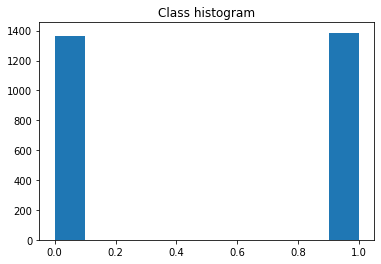

the given dataset is a Balanced dataset


In [10]:
y.hist(grid=False)
plt.title("Class histogram")
plt.show()
print("the given dataset is a Balanced dataset")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [12]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

C:\Users\harshal d\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [13]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57       272
           1       0.61      0.81      0.70       278

    accuracy                           0.65       550
   macro avg       0.66      0.65      0.64       550
weighted avg       0.66      0.65      0.64       550



## Method 2

I believe this is the correct method as it assumes the same word frequency distribution for test data as we used for training. But as it was not specified I have done both the methods

* In this method we process test data based on the frequency we get on the training data ( assuming same distribution )
* The previous method has some information about the test set as it is incorporated in the train set frequency calculations, whereas this method doesn't have such bias

In [14]:
def process_train_dataset(data):

    # regular expression for preprocessing the input to remove strings which are not words
    res = r'<.*?>|http\S+|www\S+|[^a-zA-Z\s]|\n'
    reprocess = re.compile(res)
    data[0] = data[0].apply(lambda x: re.sub(reprocess, '', x.lower()))
    
    # removing stopwords and applying stemming and lemmaitization
    data[0] = data[0].apply(lambda x: snowball_stemmer.stem(' '.join([w for w in word_tokenize(x) if w not in eng_stopwords])))
    
    data_corpus =" "
    for s in data[0]:
        data_corpus+=' '+s
    data_wordset = list(set(data_corpus.split(' ')))
    
    data_y=data.iloc[:,1:]
    data_N = len(data_y)
    data_X = pd.DataFrame()
    
    #  data_cwf["w"] denotes the number of sentences in the training data that contains the word "w"
    data_cwf = dict()

    for w in data_wordset:
        if w!='':
            data_X[w]=np.zeros(data_N,dtype=np.float64)
            data_cwf[w]=0

    for i in range(data_N):
        wst =set(data.iloc[i,0].split(' '))
        for temp in wst:
            if temp!='':
                data_cwf[temp]+=1

    # making the dataframe and features
    for i in range(data_N):
        st = data.iloc[i,0]
        fst = FreqDist(st.split(' '))
        for sw in fst:
            if sw != '':
                data_X[sw][i]=np.log(data_N/data_cwf[sw])*np.log(1+fst[sw])
                
    return data_X,data_y,data_wordset,data_cwf

def process_test_dataset(data,train_wordset,train_N,train_cwf):

    # regular expression for preprocessing the input to remove strings which are not words
    res = r'<.*?>|http\S+|www\S+|[^a-zA-Z\s]|\n'
    reprocess = re.compile(res)
    data[0] = data[0].apply(lambda x: re.sub(reprocess, '', x.lower()))
    
    # removing stopwords and applying stemming and lemmaitization
    data[0] = data[0].apply(lambda x: snowball_stemmer.stem(' '.join([w for w in word_tokenize(x) if w not in eng_stopwords])))
    
    data_y=data.iloc[:,1:]
    data_N = len(data_y)
    data_X = pd.DataFrame()

    for w in train_wordset:
        if w!='':
            data_X[w]=np.zeros(data_N,dtype=np.float64)

    # making the dataframe and features
    for i in range(data_N):
        st = data.iloc[i,0]
        fst = FreqDist(st.split(' '))
        for sw in fst:
            if sw != '' and sw in train_wordset:
                data_X[sw][i]=np.log(train_N/train_cwf[sw])*np.log(1+fst[sw])
                
    return data_X,data_y

In [15]:
df = pd.read_csv('data.txt',sep='\t',header=None)

In [16]:
dfy = df.iloc[:,1:]
df_train, df_test,_,_ = train_test_split(df, dfy, test_size=0.20, random_state=33)

In [17]:
df_train = df_train.reset_index().drop(columns=['index'])
df_test = df_test.reset_index().drop(columns=['index'])

In [18]:
X_train,y_train,wordset_train,cwf_train = process_train_dataset(df_train)

In [19]:
# we can observe that the number of columns are less as the dataset is only 80% hence we missout on some of the words
X_train.describe()

,regardless,believed,originally,derivative,saganaki,shell,goat,delivers,sources,celebration,...,intelligent,cuisin,finished,babbling,pink,feet,interview,grace,forgot,take
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,...,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,0.002427,0.002427,0.002427,0.002427,0.002427,0.002427,0.002427,0.006241,0.002427,0.002427,...,0.006241,0.002427,0.004416,0.002427,0.002427,0.006241,0.002427,0.004416,0.004416,0.024838
std,0.113773,0.113773,0.113773,0.113773,0.113773,0.113773,0.113773,0.168850,0.113773,0.113773,...,0.168850,0.113773,0.146373,0.113773,0.113773,0.168850,0.113773,0.146373,0.146373,0.290127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.333978,5.333978,5.333978,5.333978,5.333978,5.333978,5.333978,4.572478,5.333978,5.333978,...,4.572478,5.333978,4.853525,5.333978,5.333978,4.572478,5.333978,4.853525,4.853525,3.412166


In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

C:\Users\harshal d\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [21]:
X_test,y_test = process_test_dataset(df_test,wordset_train,len(y_train),cwf_train)

In [22]:
# we can observe nearly same performance of the method 2
# but it is just 1% less, which maybe due to it doesn't have that bias of knowing the frequency in test set
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.47      0.56       272
           1       0.61      0.81      0.69       278

    accuracy                           0.64       550
   macro avg       0.66      0.64      0.63       550
weighted avg       0.66      0.64      0.63       550

